In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv("exchange07062021.csv", index_col=False)

In [3]:
df.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
0,6/4/2021,US DOLLAR,2021,June,409.1800,409.6800,410.1800
1,6/4/2021,POUNDS STERLING,2021,June,578.5396,579.2466,579.9535
2,6/4/2021,EURO,2021,June,495.9262,496.5322,497.1382
3,6/4/2021,SWISS FRANC,2021,June,452.5827,453.1357,453.6888
4,6/4/2021,YEN,2021,June,3.7161,3.7206,3.7252


In [4]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [5]:
df.head()

,rate_date,currency,rate_year,rate_month,buying_rate,central_rate,selling_rate
0,6/4/2021,US DOLLAR,2021,June,409.1800,409.6800,410.1800
1,6/4/2021,POUNDS STERLING,2021,June,578.5396,579.2466,579.9535
2,6/4/2021,EURO,2021,June,495.9262,496.5322,497.1382
3,6/4/2021,SWISS FRANC,2021,June,452.5827,453.1357,453.6888
4,6/4/2021,YEN,2021,June,3.7161,3.7206,3.7252


In [6]:
df.drop(["buying_rate", "central_rate"], axis=1, inplace=True)

In [7]:
df.shape

(46459, 5)

In [8]:
df.isnull().sum()

rate_date       0
currency        0
rate_year       0
rate_month      0
selling_rate    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46459 entries, 0 to 46458
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rate_date     46459 non-null  object 
 1   currency      46459 non-null  object 
 2   rate_year     46459 non-null  int64  
 3   rate_month    46459 non-null  object 
 4   selling_rate  46459 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ MB


In [10]:
df["rate_date"] = pd.to_datetime(df.rate_date) 

In [11]:
df.rate_date.dt.dayofweek

0        4
1        4
2        4
3        4
4        4
        ..
46454    0
46455    0
46456    0
46457    0
46458    0
Name: rate_date, Length: 46459, dtype: int64

In [12]:
df.head()

,rate_date,currency,rate_year,rate_month,selling_rate
0,2021-06-04,US DOLLAR,2021,June,410.1800
1,2021-06-04,POUNDS STERLING,2021,June,579.9535
2,2021-06-04,EURO,2021,June,497.1382
3,2021-06-04,SWISS FRANC,2021,June,453.6888
4,2021-06-04,YEN,2021,June,3.7252


In [13]:
df = df[df["currency"]=="US DOLLAR"]

In [14]:
df.head()

,rate_date,currency,rate_year,rate_month,selling_rate
0,2021-06-04,US DOLLAR,2021,June,410.18
12,2021-06-03,US DOLLAR,2021,June,410.20
24,2021-06-02,US DOLLAR,2021,June,410.22
36,2021-06-01,US DOLLAR,2021,June,410.00
48,2021-05-31,US DOLLAR,2021,May,410.00


In [15]:
df.shape

(4764, 5)

In [16]:
len(df)

4764

In [17]:
df.describe()

,rate_year,selling_rate
count,4764.000000,4764.000000
mean,2011.185558,189.461566
std,5.620625,81.202054
min,2001.000000,112.850000
25%,2006.000000,129.500000
50%,2011.000000,153.180000
75%,2016.000000,292.100000
max,2021.000000,411.000000


In [18]:
df.groupby("rate_year").mean()

,selling_rate
rate_year,
2001,113.115385
2002,120.992724
2003,129.394286
2004,133.493800
2005,131.644609
2006,127.373580
2007,124.617696
2008,117.605904
2009,147.314878


In [19]:
df.groupby("rate_month").mean()["selling_rate"]

rate_month
8            155.800000
April        191.764385
August       191.025135
August\t     155.860000
December     187.792559
February     189.809116
January      188.647445
July         187.159581
June         186.034348
March        192.113600
May          189.062268
November     192.467772
October      189.781491
September    187.888769
Name: selling_rate, dtype: float64

In [20]:
df["rate_month"].replace({"8":"August", "August\t":"August"}, inplace=True)

In [21]:
df.groupby("rate_month").mean()["selling_rate"].sort_values(ascending=True)

rate_month
June         186.034348
July         187.159581
December     187.792559
September    187.888769
January      188.647445
May          189.062268
October      189.781491
February     189.809116
August       190.853032
April        191.764385
March        192.113600
November     192.467772
Name: selling_rate, dtype: float64

In [22]:
df.groupby("rate_month").median()["selling_rate"].sort_values(ascending=True)

rate_month
October      150.050
July         150.185
August       150.770
June         153.180
September    153.405
May          153.590
April        154.305
November     155.210
December     155.700
January      155.720
February     155.740
March        155.740
Name: selling_rate, dtype: float64

In [23]:
df.groupby("rate_year").mean()

,selling_rate
rate_year,
2001,113.115385
2002,120.992724
2003,129.394286
2004,133.493800
2005,131.644609
2006,127.373580
2007,124.617696
2008,117.605904
2009,147.314878


In [24]:
df.groupby("rate_year").median()

,selling_rate
rate_year,
2001,113.100
2002,120.100
2003,127.920
2004,132.870
2005,132.850
2006,127.150
2007,125.980
2008,116.650
2009,146.740


In [25]:
df.head()

,rate_date,currency,rate_year,rate_month,selling_rate
0,2021-06-04,US DOLLAR,2021,June,410.18
12,2021-06-03,US DOLLAR,2021,June,410.20
24,2021-06-02,US DOLLAR,2021,June,410.22
36,2021-06-01,US DOLLAR,2021,June,410.00
48,2021-05-31,US DOLLAR,2021,May,410.00


In [26]:
df.dtypes

rate_date       datetime64[ns]
currency                object
rate_year                int64
rate_month              object
selling_rate           float64
dtype: object

In [27]:
df.head()

,rate_date,currency,rate_year,rate_month,selling_rate
0,2021-06-04,US DOLLAR,2021,June,410.18
12,2021-06-03,US DOLLAR,2021,June,410.20
24,2021-06-02,US DOLLAR,2021,June,410.22
36,2021-06-01,US DOLLAR,2021,June,410.00
48,2021-05-31,US DOLLAR,2021,May,410.00


In [28]:
df.rate_date.dt.day

0         4
12        3
24        2
36        1
48       31
         ..
46433    14
46436    13
46445    12
46448    11
46457    10
Name: rate_date, Length: 4764, dtype: int64

In [29]:

# convert int to float for 2018 air pollution column
#df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

# convert from float to int
#df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)

# convert mpg columns to floats
#mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
#for c in mpg_columns:
#    df_18[c] = df_18[c].astype(float)
#    df_08[c] = df_08[c].astype(float)


# save new datasets for next section
#df_08.to_csv('data_08_v1.csv', index=False)

<AxesSubplot:xlabel='rate_year'>

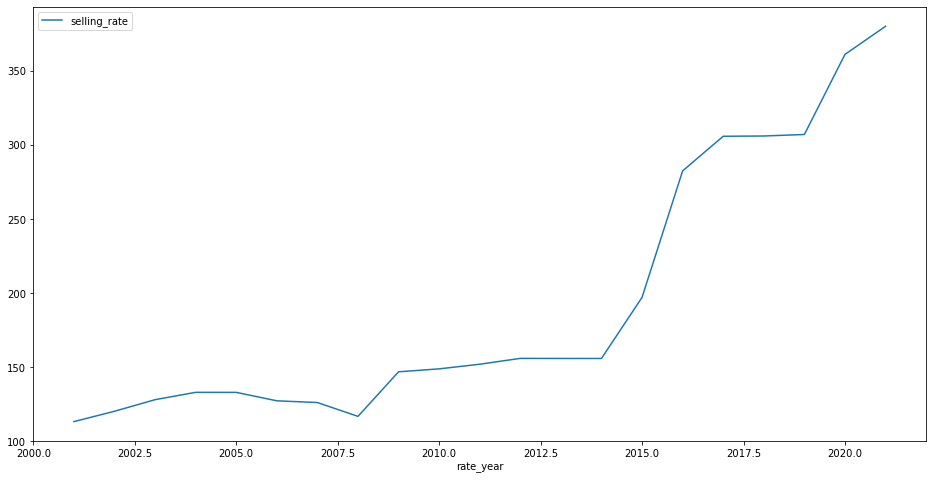

In [30]:
df.groupby("rate_year").median().plot(figsize=(16,8))

<AxesSubplot:xlabel='rate_year'>

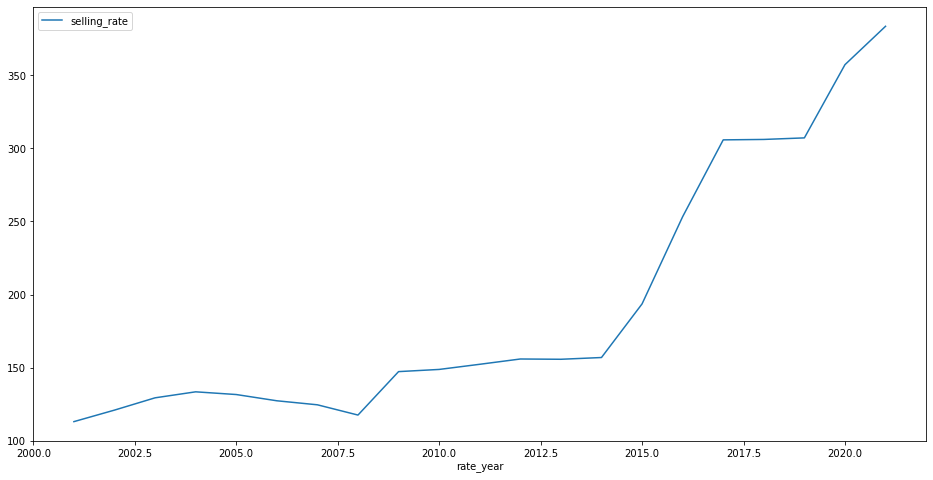

In [31]:
df.groupby("rate_year").mean().plot(figsize=(16,8))

In [32]:
a = [10,20,30,40,4000,50000]

In [33]:
np.mean(a)

9016.666666666666

In [34]:
np.median(a)

35.0

In [35]:
b = [10,20,30,35,40,4000,50000]

In [36]:
np.mean(b)

7733.571428571428

In [37]:
np.median(b)

35.0

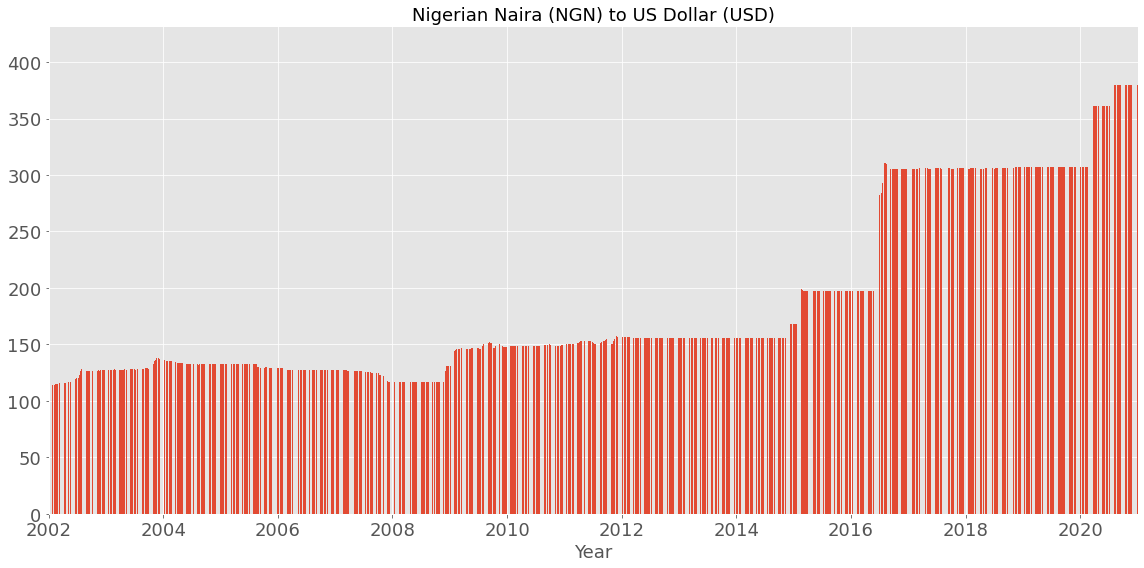

In [38]:
plt.style.use('ggplot')

plt.figure(figsize=(16,8))
plt.title("Nigerian Naira (NGN) to US Dollar (USD)", fontsize=18)
plt.bar(df["rate_date"],df["selling_rate"])
plt.xlabel("Year", fontsize=18)
plt.xlim("2002","2021")
plt.tick_params(labelsize=18)
plt.tight_layout()


In [39]:
df1 = df.groupby("rate_year").mean().reset_index()

In [40]:
df1

,rate_year,selling_rate
0,2001,113.115385
1,2002,120.992724
2,2003,129.394286
3,2004,133.493800
4,2005,131.644609
5,2006,127.373580
6,2007,124.617696
7,2008,117.605904
8,2009,147.314878
9,2010,148.805894


In [41]:
year = df1["rate_year"]

In [42]:
year

0     2001
1     2002
2     2003
3     2004
4     2005
5     2006
6     2007
7     2008
8     2009
9     2010
10    2011
11    2012
12    2013
13    2014
14    2015
15    2016
16    2017
17    2018
18    2019
19    2020
20    2021
Name: rate_year, dtype: int64

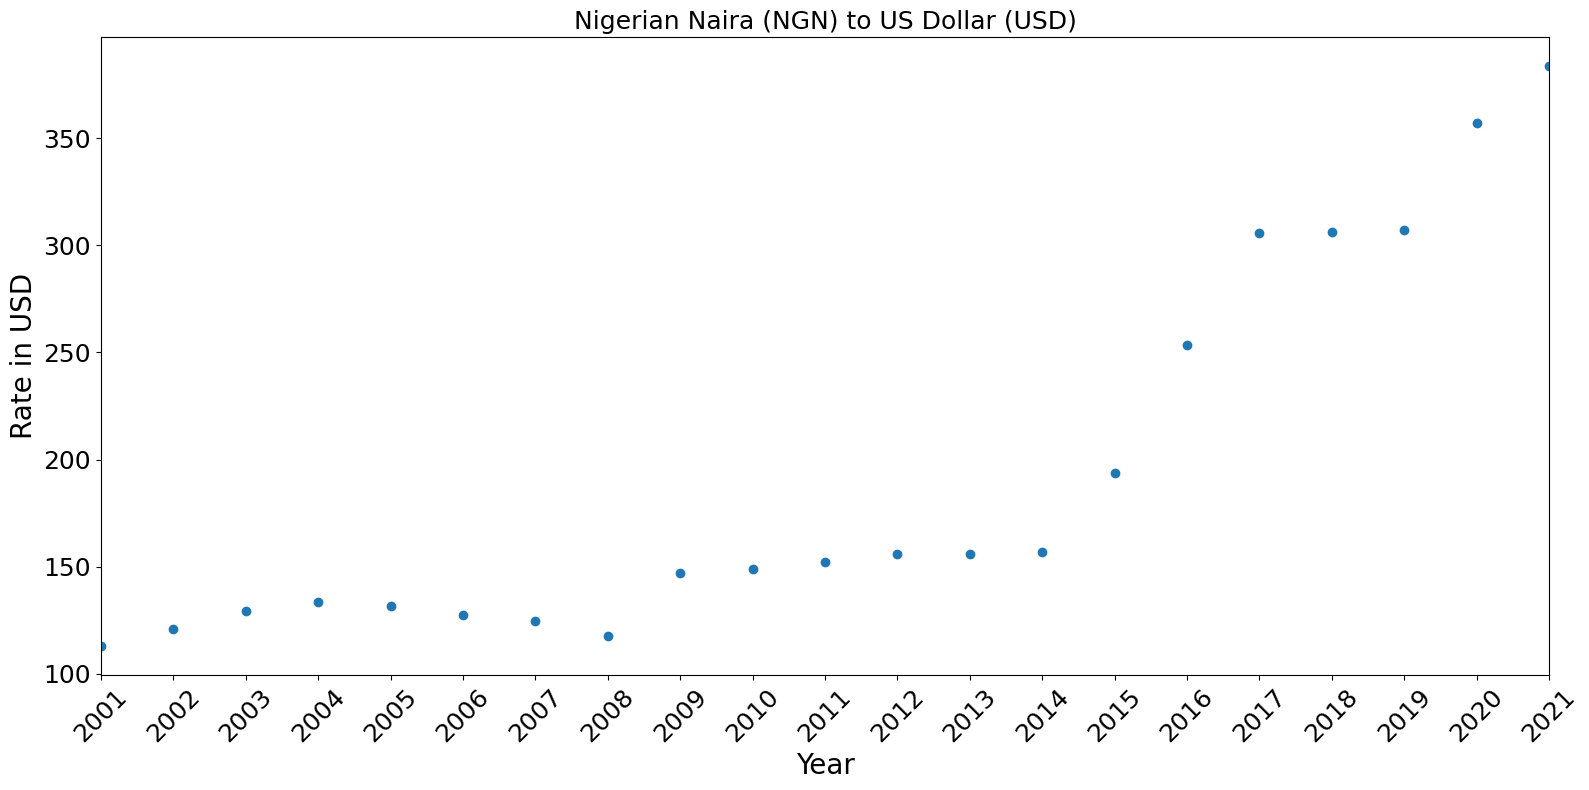

In [43]:
plt.style.use('default')


plt.figure(figsize=(16,8))
plt.title("Nigerian Naira (NGN) to US Dollar (USD)", fontsize=18)
plt.scatter(df1["rate_year"],df1["selling_rate"])
plt.ylabel("Rate in USD", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.xticks(ticks=year, rotation = 45)
plt.xlim(2001,2021)
plt.tick_params(labelsize=18)
plt.tight_layout()


# Same Figure as Above presented using an X-Y plot

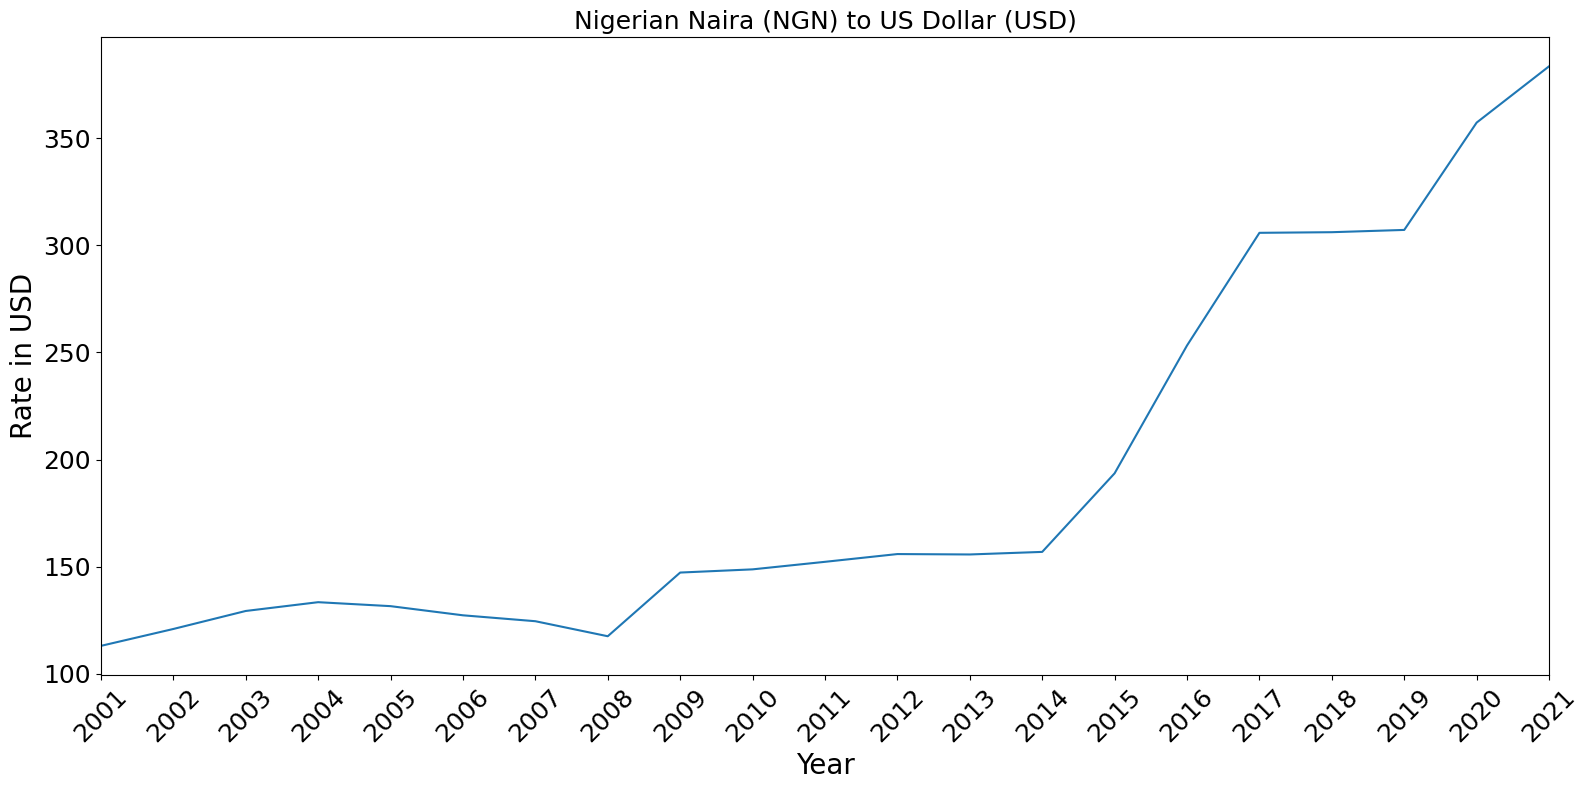

In [44]:
plt.style.use('default')


plt.figure(figsize=(16,8))
plt.title("Nigerian Naira (NGN) to US Dollar (USD)", fontsize=18)
plt.plot(df1["rate_year"],df1["selling_rate"])
plt.ylabel("Rate in USD", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.xticks(ticks=year, rotation = 45)
plt.xlim(2001,2021)
plt.tick_params(labelsize=18)
plt.tight_layout()

# Same Figure as Above presented using a bar chart

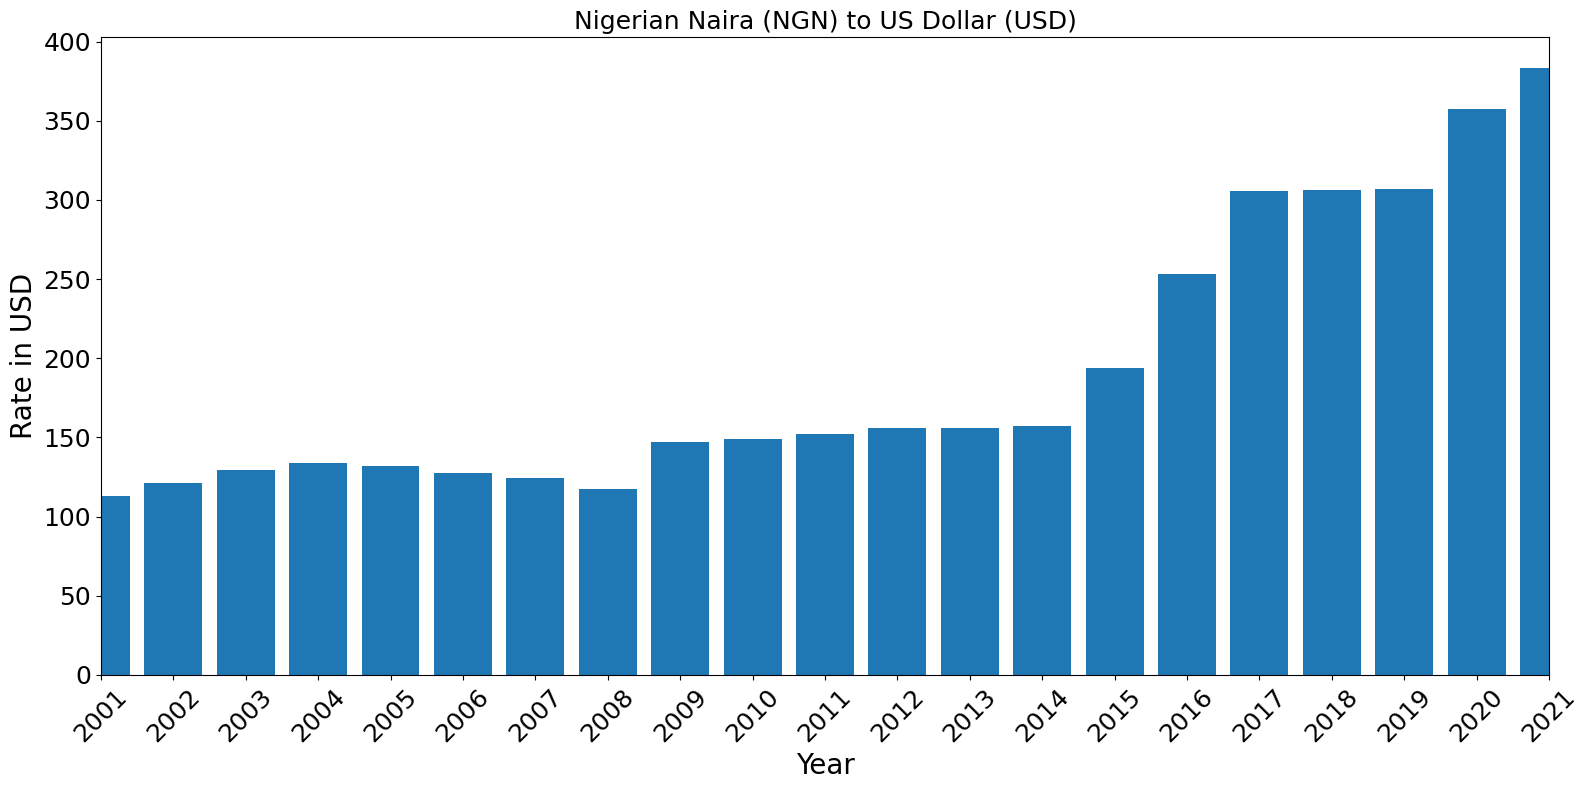

In [84]:
plt.style.use('default')


plt.figure(figsize=(16,8))
plt.title("Nigerian Naira (NGN) to US Dollar (USD)", fontsize=18)
plt.bar(df1["rate_year"],df1["selling_rate"])
plt.ylabel("Rate in USD", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.xticks(ticks=year, rotation = 45)
plt.xlim(2001,2021)
plt.tick_params(labelsize=18)
plt.tight_layout()

# Machine Learning Section (Decision Tree and Random Forest)

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [49]:
df1.head(1)

,rate_year,selling_rate
0,2001,113.115385


In [51]:
y = df1.selling_rate

In [60]:
X = np.array(df1.rate_year)

In [61]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state=1)

# Decision Tree 

In [62]:
rate_model1 = DecisionTreeRegressor(random_state=1)

In [65]:
rate_model1.fit(train_X.reshape(-1, 1), train_y)

DecisionTreeRegressor(random_state=1)

In [67]:
val_predictions = rate_model1.predict(val_X.reshape(-1, 1))

In [68]:
val_mae = mean_absolute_error(val_predictions, val_y)

In [69]:
print(val_mae)

23.519267423672567


In [70]:
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))


Validation MAE when not specifying max_leaf_nodes: 24


In [73]:
rate_model1 = DecisionTreeRegressor (max_leaf_nodes=1000, random_state=1)
rate_model1.fit(train_X.reshape(-1, 1), train_y)
val_predictions = rate_model1.predict(val_X.reshape(-1, 1))
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))


Validation MAE for best value of max_leaf_nodes: 24


# Random Forest

In [74]:
rf_model = RandomForestRegressor(random_state=1)


In [75]:
rf_model.fit(train_X.reshape(-1, 1), train_y)

RandomForestRegressor(random_state=1)

In [77]:
pred = rf_model.predict(val_X.reshape(-1, 1))

In [78]:
rf_val_mae = mean_absolute_error(val_y, pred)


In [117]:
print(val_y)
print(pred)

15    253.234073
10    152.322675
3     133.493800
18    307.142975
17    306.081000
Name: selling_rate, dtype: float64
[217.09367482 149.93944757 129.1130092  342.48154218 312.06512133]


In [79]:
print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))


Validation MAE for Random Forest Model: 16.845420836748684


With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. In plain English, it can be said as

On average, our predictions are off by about X.

In [110]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(val_y, pred))
print('Mean Squared Error:', metrics.mean_squared_error(val_y, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_y, pred)))

Mean Absolute Error: 16.845420836748684
Mean Squared Error: 523.1246948350931
Root Mean Squared Error: 22.871919351796716


In [98]:
df1.describe()

,rate_year,selling_rate
count,21.000000,21.000000
mean,2011.000000,191.517135
std,6.204837,87.378491
min,2001.000000,113.115385
25%,2006.000000,129.394286
50%,2011.000000,152.322675
75%,2016.000000,253.234073
max,2021.000000,383.461979


In [116]:
100 - ((16.845420836748684/191.517135) * 100)

91.20422262125597

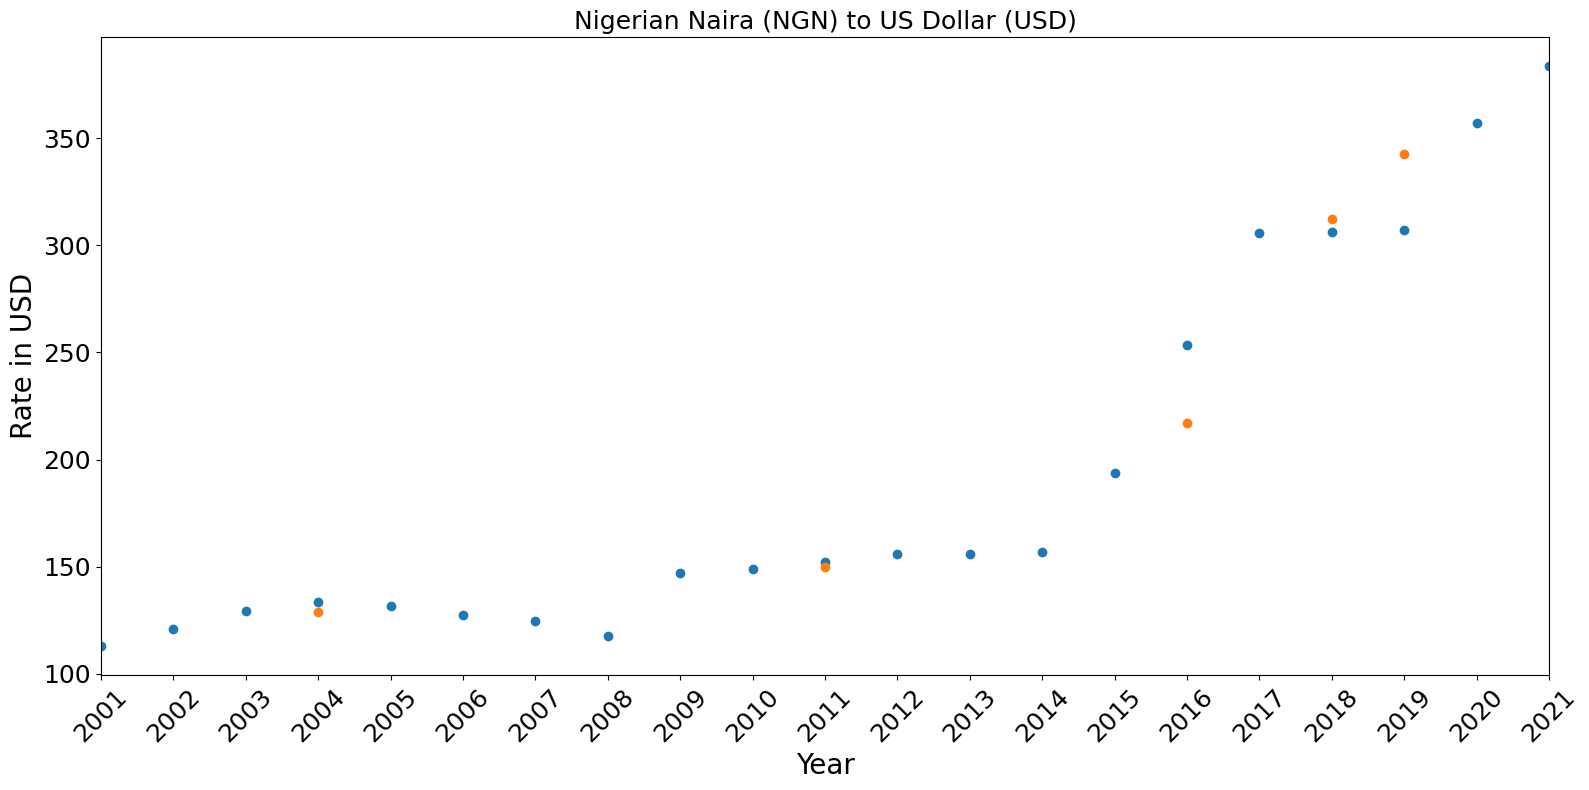

In [120]:
plt.style.use('default')

plt.figure(figsize=(16,8))
plt.title("Nigerian Naira (NGN) to US Dollar (USD)", fontsize=18)
plt.scatter(df1["rate_year"],df1["selling_rate"])
plt.scatter(val_X, pred)
plt.ylabel("Rate in USD", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.xticks(ticks=year, rotation = 45)
plt.xlim(2001,2021)
plt.tick_params(labelsize=18)
plt.tight_layout()

Check out - https://youtu.be/QIUxPv5PJOY 

Check out - https://youtu.be/hOLSGMEEwlI 